<a href="https://colab.research.google.com/github/Ariqueeezz/Personal_Data_Science_Projects/blob/main/ML_BankTransaction/Submission_Akhir_BMLP_Raihan_Ariq_Muzakki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [55]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [56]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [57]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [58]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

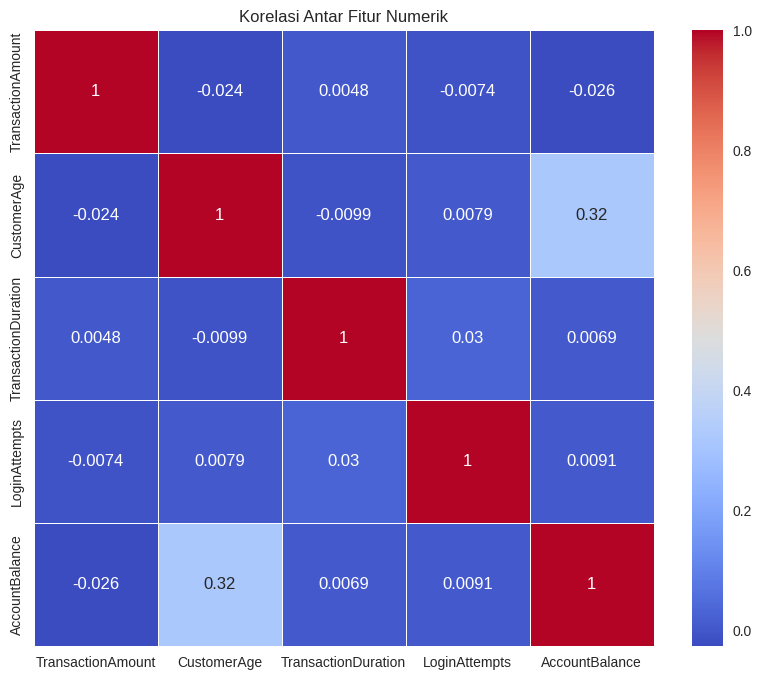

In [59]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numeric_features = df.select_dtypes(include=['number']).columns

korelasi = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

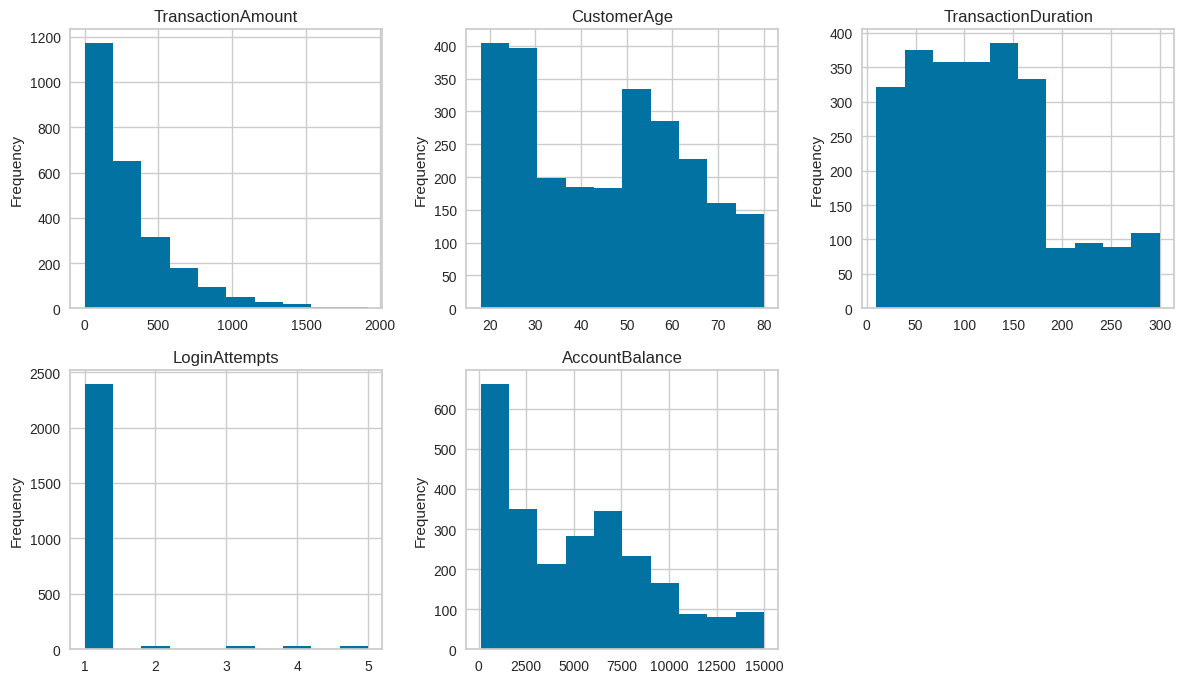

In [60]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
n_vars = len(numeric_features)
n_cols = 3
n_rows = -(-n_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 7))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
  df[col].hist(ax=axes[i])
  axes[i].set_title(col)
  axes[i].set_ylabel('Frequency')

for j in range(i+1, n_rows*n_cols):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

<Figure size 100x200 with 0 Axes>

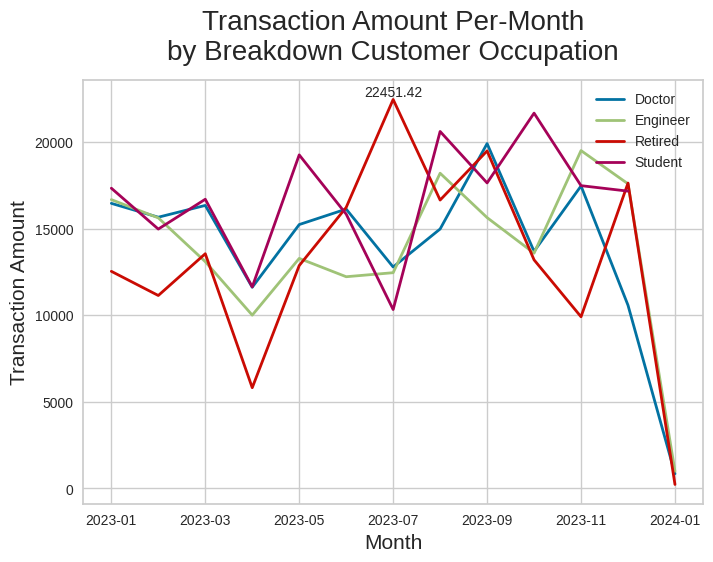

In [61]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# df['TransactionDate'] =
df['TransactionYearMonth'] = pd.to_datetime(df['TransactionDate']).dt.strftime('%Y-%m')

plt.figure(figsize=(1, 2))
df.groupby(['CustomerOccupation', 'TransactionYearMonth'])['TransactionAmount'].sum().sort_values(ascending=False).unstack(level=0).plot(kind='line', linewidth=2, )
plt.title("Transaction Amount Per-Month\nby Breakdown Customer Occupation", fontsize=20, pad=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Transaction Amount", fontsize=15)
plt.legend(loc='upper right')

value = df.groupby(['CustomerOccupation', 'TransactionYearMonth'])['TransactionAmount'].sum()['Retired']['2023-07']
plt.text(6, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [62]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [63]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [64]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df[numeric_features].head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,0.268963,1.307715,0.307960,-0.204629,2.218381
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
4,-0.972736,NaN,1.121495,-0.204629,0.594263


In [65]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'])

In [66]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df['TransactionType'] = df['TransactionType'].fillna(df['TransactionType'].mode()[0])
df['Channel'] = df['Channel'].fillna(df['Channel'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['CustomerOccupation'] = df['CustomerOccupation'].fillna(df['CustomerOccupation'].mode()[0])

categorical_features = df.select_dtypes(include=['object']).columns
encoders = {}

for col in categorical_features:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

df[categorical_features]

,TransactionType,Location,Channel,CustomerOccupation,TransactionYearMonth
0,1,36,0,0,3
1,1,15,0,0,5
2,1,23,2,3,6
3,1,33,2,3,4
4,0,1,2,3,9
...,...,...,...,...,...
2532,1,2,2,2,4
2533,1,34,2,0,5
2534,1,7,1,2,6
2535,0,40,1,3,4


In [67]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate',
 'TransactionYearMonth']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [68]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Imputasi Kolom Numerik dengan Median
for col in numeric_features:
  df[col] = df[col].fillna(df[col].median())

# Menghapus Kolom Timeseries dengan Menghapusnya
df = df.drop(columns=['TransactionDate', 'PreviousTransactionDate', 'TransactionYearMonth'])

df.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [69]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [70]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

q1 = df[numeric_features].quantile(0.25)
q3 = df[numeric_features].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

for col in numeric_features:
  df[col] = np.where(
      ((df[col] < batas_bawah[col]) | (df[col] > batas_atas[col])),
      df[col].median(),
      df[col])

df[numeric_features].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2513.000000,2513.000000,2513.000000,2.513000e+03,2513.000000
mean,-0.153902,-0.002676,0.000904,-2.046294e-01,0.000207
std,0.722355,0.994839,0.994160,1.052146e-14,0.995098
min,-1.017881,-1.495947,-1.561745,-2.046294e-01,-1.286100
25%,-0.734144,-0.991288,-0.805299,-2.046294e-01,-0.922216
50%,-0.295362,0.018031,-0.105944,-2.046294e-01,-0.097334
75%,0.212182,0.803056,0.593411,-2.046294e-01,0.648879
max,2.050618,1.980594,2.577295,-2.046294e-01,2.531190


In [71]:
df.shape

(2513, 9)

In [72]:
df.columns

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

In [73]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# bins_amount = [0, 0.25, 0.50, 0.75, 1]
# label_amount = ["Sangat Rendah", "Rendah", "Tinggi", "Sangat Tinggi"]
# df['TransactionAmount_binned'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=label_amount)
bins_amount = [-np.inf, -1, 0, 1, np.inf]
label_amount = ["Sangat Rendah", "Rendah", "Tinggi", "Sangat Tinggi"]
df['TransactionAmount_binned'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=label_amount)

# bins_duration = [0, 0.25, 0.50, 0.75, 1]
# label_duration = ["Sangat Cepat", "Cepat", "Lama", "Sangat Lama"]
# df['TransactionDuration_binned'] = pd.cut(df['TransactionDuration'], bins=bins_duration, labels=label_duration)
bins_duration = [-np.inf, -1, 0, 1, np.inf]
label_duration = ["Sangat Cepat", "Cepat", "Lama", "Sangat Lama"]
df['TransactionDuration_binned'] = pd.cut(df['TransactionDuration'], bins=bins_duration, labels=label_duration)

binned_features = ['TransactionAmount_binned', 'TransactionDuration_binned']

for col in binned_features:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])
  encoders[col] = encoder

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_binned,TransactionDuration_binned
0,-0.970546,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,0,0
1,0.268963,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,3,1
2,-0.586526,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,0,0
3,-0.387294,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,0,2
4,-0.972736,0,1,2,0.018031,3,1.121495,-0.204629,0.594263,0,3


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [74]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_binned,TransactionDuration_binned
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2.513000e+03,2513.000000,2513.000000,2513.000000
mean,-0.153902,0.776363,20.918424,0.989256,-0.002676,1.520493,0.000904,-2.046294e-01,0.000207,0.907282,1.107043
std,0.722355,0.416765,12.193214,0.804721,0.994839,1.134504,0.994160,1.052146e-14,0.995098,1.297259,1.046340
min,-1.017881,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000
25%,-0.734144,1.000000,11.000000,0.000000,-0.991288,0.000000,-0.805299,-2.046294e-01,-0.922216,0.000000,0.000000
50%,-0.295362,1.000000,21.000000,1.000000,0.018031,2.000000,-0.105944,-2.046294e-01,-0.097334,0.000000,1.000000
75%,0.212182,1.000000,31.000000,2.000000,0.803056,3.000000,0.593411,-2.046294e-01,0.648879,2.000000,2.000000
max,2.050618,1.000000,42.000000,2.000000,1.980594,3.000000,2.577295,-2.046294e-01,2.531190,3.000000,3.000000


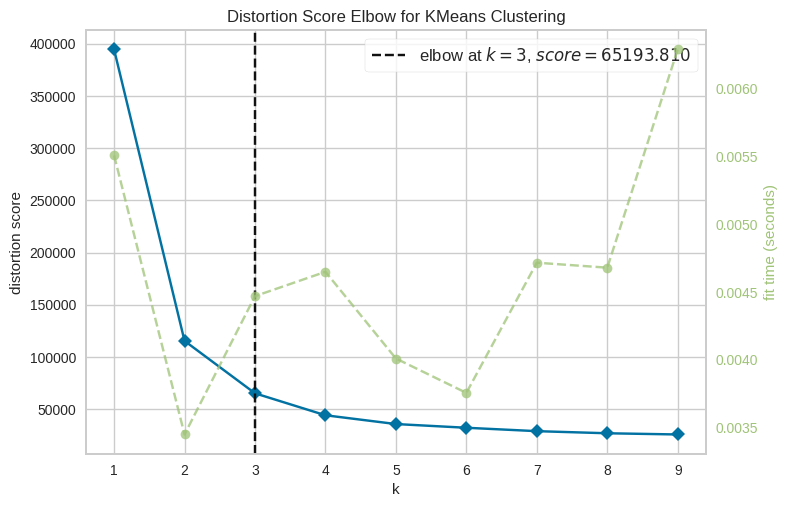

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

X = df.values

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [76]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

Jalankan cell code ini untuk menyimpan model kamu.

In [77]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [78]:
# Menghitung dan menampilkan nilai Silhouette Score.
labels = kmeans.labels_
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.47354891291013107


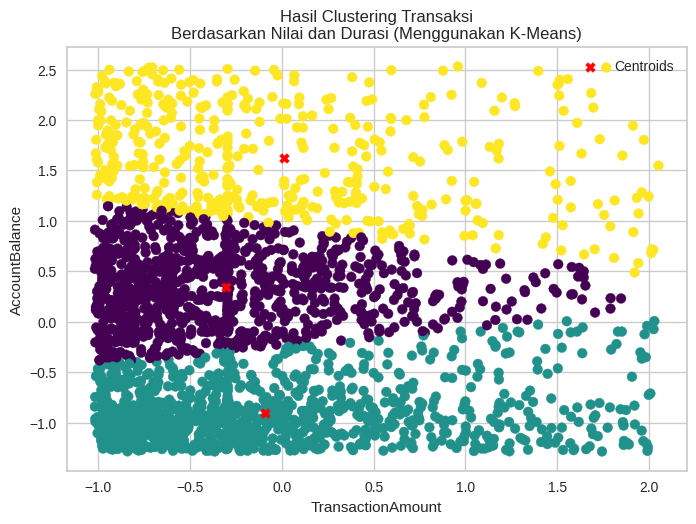

In [80]:
# Membuat visualisasi hasil clustering
x_label = 'TransactionAmount'
y_label = 'AccountBalance'

X_visualisasi = df[[x_label, y_label]].values

kmeans_visualisasi = KMeans(n_clusters=3)
kmeans_visualisasi.fit(X_visualisasi)

labels_visualisasi = kmeans_visualisasi.labels_
centroids_visualisasi = kmeans_visualisasi.cluster_centers_

plt.scatter(X_visualisasi[:, 0], X_visualisasi[:, 1], c=labels_visualisasi, cmap='viridis')
plt.scatter(centroids_visualisasi[:, 0], centroids_visualisasi[:, 1], marker='X', color='red', label='Centroids')
plt.title('Hasil Clustering Transaksi\nBerdasarkan Nilai dan Durasi (Menggunakan K-Means)')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

0.5442953678127503


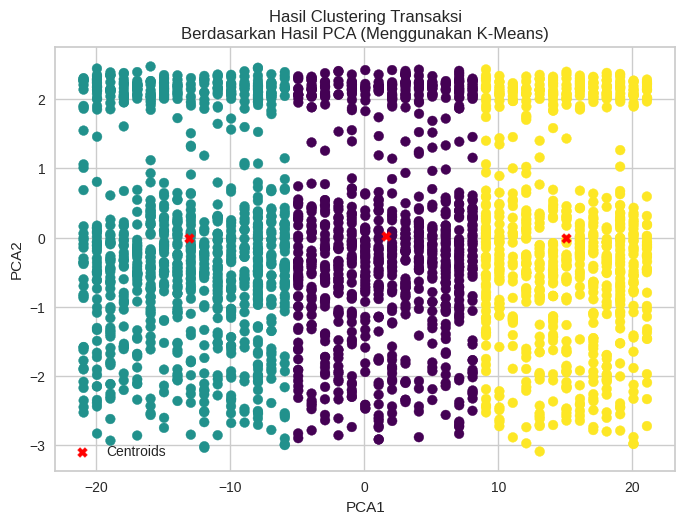

In [81]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_1 = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(PCA_1)

labels_pca = kmeans_pca.labels_
centroids_pca = kmeans_pca.cluster_centers_

print(silhouette_score(PCA_1, labels_pca))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', color='red', label='Centroids')
plt.title('Hasil Clustering Transaksi\nBerdasarkan Hasil PCA (Menggunakan K-Means)')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()

In [82]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [84]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

X = pd.DataFrame(data=X, columns=df.columns)
X['Target'] = labels
X.groupby('Target').agg(['mean', 'min', 'max'])[numeric_features]

TransactionAmount                     CustomerAge                      \
                    mean       min       max        mean       min       max   
Target                                                                         
0              -0.147071 -1.013945  2.023990   -0.053154 -1.495947  1.980594   
1              -0.166575 -1.017676  2.050618    0.022994 -1.495947  1.980594   
2              -0.145460 -1.017881  2.028200    0.012376 -1.495947  1.980594   

       TransactionDuration                     LoginAttempts            \
                      mean       min       max          mean       min   
Target                                                                   
0                -0.020621 -1.561745  2.520205     -0.204629 -0.204629   
1                 0.008627 -1.561745  2.577295     -0.204629 -0.204629   
2                 0.010995 -1.561745  2.577295     -0.204629 -0.204629   

                 AccountBalance                      
             max           mean       min       max  
Target                                               
0      -0.204629       0.011636 -1.285856  2.531190  
1      -0.204629       0.013744 -1.286100  2.522155  
2      -0.204629      -0.025245 -1.283147  2.485031

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.


1. **Cluster 0: (Nasabah Paling Muda Efisien)**:
   - **Rata-rata (mean) TransactionAmount:** -0.147 <Standar> (Sedikit di Bawah Rata-rata)
   - **Rata-rata (mean) CustomerAge:** -0.053 <Standar> (Paling Muda / Di Bawah Rata-rata)
   - **Rata-rata (mean) AccountBalance:** 0.011 <Standar> (Normal / Rata-rata)
   - **Rata-rata (mean) TransactionDuration:** -0.020 <Standar> (Durasi Cepat)
   - **Rata-rata (mean) LoginAttempts:** -0.204 <Standar> (Jarang Gagal Login / Stabil)
   - **Analisis:** Cluster ini didominasi oleh **nasabah dengan usia paling muda** dibandingkan kelompok lainnya. Secara finansial, mereka berada di **posisi penyeimbang (moderat)**; nilai transaksi dan saldo akun mereka berada di angka rata-rata populasi (tidak terlalu boros, tapi belum terlalu kaya). Durasi transaksi mereka cenderung cepat, menunjukkan mereka terbiasa dengan teknologi (*tech-savvy*).
     
     Nasabah dalam cluster ini kemungkinan adalah kalangan *First Jobber* atau Mahasiswa tingkat akhir yang keuangannya mulai stabil namun belum besar. Mereka adalah target yang tepat untuk produk **rekening tabungan digital sehari-hari** atau **kartu kredit limit awal** untuk membangun riwayat kredit.

2. **Cluster 1: (Nasabah Penabung)**:
   - **Rata-rata (mean) TransactionAmount:** -0.166 <Standar> (Paling Rendah)
   - **Rata-rata (mean) CustomerAge:** 0.023 <Standar> (Paling Tua / Dewasa)
   - **Rata-rata (mean) AccountBalance:** 0.013 <Standar> (Paling Tinggi)
   - **Rata-rata (mean) TransactionDuration:** 0.008 <Standar> (Durasi Normal)
   - **Rata-rata (mean) LoginAttempts:** -0.204 <Standar> (Jarang Gagal Login / Stabil)
   - **Analisis:** Cluster ini mencakup nasabah dengan **saldo akun tertinggi** namun memiliki **nilai transaksi paling rendah (hemat)**. Nasabah ini merupakan golongan usia paling tua/matang dibanding cluster lain. Pola ini menunjukkan karakteristik nasabah yang **konservatif dan efisien**; mereka menyimpan banyak uang tapi jarang membelanjakannya dalam jumlah besar.
     
     Nasabah dalam Cluster ini cenderung sangat berhati-hati dalam pengelolaan uang (*Risk Averse*). Dana mereka cenderung "mengendap". Nasabah ini adalah target utama untuk direkomendasikan produk investasi jangka panjang seperti **Deposito Berjangka** atau **Reksa Dana Pasar Uang** yang menawarkan imbal hasil lebih baik daripada membiarkan saldo menganggur di rekening biasa.

3. **Cluster 2: (Nasabah Konsumtif)**:
   - **Rata-rata (mean) TransactionAmount:** -0.145 <Standar> (Relatif Paling Tinggi)
   - **Rata-rata (mean) CustomerAge:** 0.012 <Standar> (Usia Menengah)
   - **Rata-rata (mean) AccountBalance:** -0.025 <Standar> (Paling Rendah / Tergerus)
   - **Rata-rata (mean) TransactionDuration:** 0.011 <Standar> (Durasi Sedikit Lama)
   - **Rata-rata (mean) LoginAttempts:** -0.204 <Standar> (Jarang Gagal Login / Stabil)
   - **Analisis:** Cluster ini berisi nasabah dengan **saldo akun paling rendah** tetapi memiliki aktivitas **transaksi yang relatif lebih tinggi** dibandingkan Cluster 1 (Penabung). Ini mengindikasikan pola "uang masuk, uang keluar" atau konsumsi yang tinggi sehingga saldo mereka cenderung tipis. Dari segi usia, mereka berada di pertengahan (Masa Produktif).
     
     Nasabah ini memiliki daya beli atau kebutuhan transaksi yang aktif namun mungkin kesulitan menabung (*Cashflow Tight*). Mereka bisa dijadikan target untuk penawaran **KTA (Kredit Tanpa Agunan)**, **Promo Cashback Belanja**, atau fitur **Manajemen Keuangan (Financial Planner)** untuk membantu mereka mengelola arus kas agar saldo tidak terus-menerus rendah.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [85]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = labels
df['Target']

,Target
0,0
1,1
2,2
3,0
4,1
...,...
2508,0
2509,0
2510,1
2511,2


In [86]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [87]:
# inverse dataset ke rentang normal untuk numerikal
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df[numeric_features] = scaler.inverse_transform(df[numeric_features])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_binned,TransactionDuration_binned,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,0,0,0
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,3,1,1
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,0,0,2
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,0,2,0
4,13.45,0,1,2,45.0,3,198.0,1.0,7429.40,0,3,1


In [88]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
df_inverse = df.copy()

categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'TransactionAmount_binned', 'TransactionDuration_binned']

for col in categorical_cols:
    encoder = encoders[col]
    df_inverse[col] = encoder.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
df_inverse

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_binned,TransactionDuration_binned,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Rendah,Cepat,0
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Tinggi,Lama,1
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Rendah,Cepat,2
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Rendah,Sangat Cepat,0
4,13.45,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,Rendah,Sangat Lama,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2508,251.54,Debit,Tucson,Branch,48.0,Doctor,177.0,1.0,254.75,Rendah,Lama,0
2509,28.63,Debit,San Diego,Branch,56.0,Retired,146.0,1.0,3382.91,Rendah,Lama,0
2510,185.97,Debit,Denver,Online,23.0,Student,19.0,1.0,1776.91,Rendah,Sangat Cepat,1
2511,243.08,Credit,Jacksonville,Online,24.0,Student,93.0,1.0,131.25,Rendah,Cepat,2


In [89]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
# categorical_features = df_inverse.select_dtypes(include=['object']).columns
# numeric_features = df_inverse.select_dtypes(include=['number']).columns

print(df_inverse.groupby('Target')[numeric_features].agg(['mean', 'min', 'max']))
print()
print(df_inverse.groupby('Target')[categorical_features[0:4]].agg(lambda x: pd.Series.mode(x)[0]))

       TransactionAmount               CustomerAge              \
                    mean   min     max        mean   min   max   
Target                                                           
0             254.686512  1.41  889.01   43.730506  18.0  80.0   
1             248.988019  0.32  896.79   45.088514  18.0  80.0   
2             255.157215  0.26  890.24   44.899160  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               117.978112  10.0  296.0           1.0  1.0  1.0   
1               120.027397  10.0  300.0           1.0  1.0  1.0   
2               120.193277  10.0  300.0           1.0  1.0  1.0   

       AccountBalance                    
                 mean     min       max  
Target                                   
0         5158.784241  102.20  14977.99  
1         5167.002329  101.25  1

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Paling Muda Efisien)**:
   - **Rata-rata (mean) TransactionAmount:** -0.147 (Std) / 254.69 (Real)
   - **Rata-rata (mean) CustomerAge:** -0.053 (Std) / 43.73 Tahun (Real)
   - **Rata-rata (mean) AccountBalance:** 0.011 (Std) / 5158.78 (Real)
   - **Rata-rata (mean) TransactionDuration:** -0.020 (Std) / 117.98 Detik (Real)
   - **Rata-rata (mean) LoginAttempts:** -0.204 (Std) / 1.0 Kali (Real)
   - **Lokasi Dominan:** Philadelphia
   - **Analisis:** Cluster ini mencakup nasabah dengan **usia rata-rata paling muda (43 tahun)** dibandingkan kelompok lainnya. Nilai transaksi mereka berada di level menengah (254.69), namun menariknya mereka memiliki **durasi transaksi paling cepat** (117 detik). Ini menandakan mereka nasabah yang *tech-savvy* atau terbiasa melakukan transaksi rutin dengan cepat.
     
     Secara finansial, saldo mereka (5158.78) cukup sehat dan seimbang. Nasabah dalam cluster ini memiliki profil risiko moderat; mereka bukan penabung ekstrem tapi juga tidak boros. Produk yang cocok adalah **Tabungan Digital** dengan fitur kemudahan akses (mobile banking) yang responsif, sesuai dengan karakter mereka yang menyukai kecepatan transaksi.

2. **Cluster 1: (Nasabah Penabung)**:
   - **Rata-rata (mean) TransactionAmount:** -0.166 (Std) / 248.99 (Real)
   - **Rata-rata (mean) CustomerAge:** 0.023 (Std) / 45.09 Tahun (Real)
   - **Rata-rata (mean) AccountBalance:** 0.013 (Std) / 5167.00 (Real)
   - **Rata-rata (mean) TransactionDuration:** 0.008 (Std) / 120.03 Detik (Real)
   - **Rata-rata (mean) LoginAttempts:** -0.204 (Std) / 1.0 Kali (Real)
   - **Lokasi Dominan:** Fort Worth
   - **Analisis:** Cluster ini adalah definisi klasik dari nasabah tipe **Penabung (Saver)**. Mereka memiliki **saldo rata-rata tertinggi** (5167.00) namun dengan **nilai transaksi rata-rata terendah** (248.99). Usia mereka rata-rata paling tua/matang (45 tahun), mencerminkan stabilitas finansial.
     
     Nasabah ini cenderung menahan uangnya di bank daripada membelanjakannya. Mereka sangat berhati-hati (*prudent*). Strategi terbaik untuk nasabah ini adalah menawarkan instrumen **Investasi Rendah Risiko** seperti Deposito atau Obligasi Ritel, karena dana mereka cenderung "menganggur" di rekening tabungan biasa.

3. **Cluster 2: (The Active Spender / Nasabah Konsumtif)**:
   - **Rata-rata (mean) TransactionAmount:** -0.145 (Std) / 255.16 (Real)
   - **Rata-rata (mean) CustomerAge:** 0.012 (Std) / 44.90 Tahun (Real)
   - **Rata-rata (mean) AccountBalance:** -0.025 (Std) / 5015.05 (Real)
   - **Rata-rata (mean) TransactionDuration:** 0.011 (Std) / 120.19 Detik (Real)
   - **Rata-rata (mean) LoginAttempts:** -0.204 (Std) / 1.0 Kali (Real)
   - **Lokasi Dominan:** Los Angeles
   - **Analisis:** Cluster ini mencakup nasabah dengan **nilai transaksi rata-rata tertinggi** (255.16) tetapi memiliki **saldo akun rata-rata terendah** (5015.05). Pola "High Spending, Low Balance" ini mengindikasikan gaya hidup yang lebih konsumtif atau kebutuhan likuiditas yang tinggi. Durasi transaksi mereka paling lama (120 detik), mungkin karena jenis transaksi yang lebih kompleks atau kehati-hatian saat mentransfer jumlah besar.
     
     Nasabah ini aktif memutar uang. Mereka adalah target potensial untuk produk **Pinjaman (KTA/Kredit)** atau program **Reward/Cashback** untuk setiap transaksi, yang akan mendorong mereka untuk terus menggunakan layanan bank ini sebagai akun transaksional utama mereka.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [90]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
target_mapping = {0: 'Muda Efisien', 1: 'Penabung', 2: 'Konsumtif'}

df_inverse['Target'] = df_inverse['Target'].map(target_mapping)
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_binned,TransactionDuration_binned,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Rendah,Cepat,Muda Efisien
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Tinggi,Lama,Penabung
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Rendah,Cepat,Konsumtif
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Rendah,Sangat Cepat,Muda Efisien
4,13.45,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,Rendah,Sangat Lama,Penabung


In [91]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.